In [1]:
library(data.table)
library(dplyr)
library(stringr)


Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:data.table’:

    between, first, last


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
variant <- fread("variant_with_maf_new.csv")
head(variant)

Identifier,sampleID,frequency,dbSNP id (g),Gene name (d),Entrez gene id (e),Chromosome (f),Start (f),End (f),Cytoband (f),AA Impact (h),1000 Genome (i),ESP5400 (j),SIFT Score (k),SNP Type (l),Polyphen (m),Variant class (n),AF,rare
<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<lgl>
chr10:100010849_G_A,ME:SK-MEL-2,45.238,-,LOXL4,84171,10,100010849,100010849,10q24,R725W,0.00,0.00000,0.00,Missense,1,Type 2,1.0e-06,TRUE
chr10:100013418_T_G,ME:SK-MEL-2,56.140,rs148260647,LOXL4,84171,10,100013418,100013418,10q24,Y576S,0.00,0.00019,0.32,Missense,1,Type 1,6.0e-05,TRUE
chr10:100017453_T_G,BR:MCF7,64.151,rs1983864,LOXL4,84171,10,100017453,100017453,10q24,D405A,0.36,0.24900,0.00,Missense,1,Type 1,2.9e-01,FALSE
chr10:100017453_T_G,BR:MDA-MB-231,28.571,rs1983864,LOXL4,84171,10,100017453,100017453,10q24,D405A,0.36,0.24900,0.00,Missense,1,Type 1,2.9e-01,FALSE
chr10:100017453_T_G,BR:HS 578T,100.000,rs1983864,LOXL4,84171,10,100017453,100017453,10q24,D405A,0.36,0.24900,0.00,Missense,1,Type 1,2.9e-01,FALSE
chr10:100017453_T_G,CNS:U251,27.273,rs1983864,LOXL4,84171,10,100017453,100017453,10q24,D405A,0.36,0.24900,0.00,Missense,1,Type 1,2.9e-01,FALSE


In [3]:
variant$sampleID <- variant$sampleID %>%
  strsplit(":")  %>%
  sapply( tail, 1 ) %>%
  str_replace_all("-","")%>%
  str_replace_all(" ","")%>%
  str_replace("(TB)","")%>%
  str_replace("UO31","U031")

In [4]:
head(variant)

Identifier,sampleID,frequency,dbSNP id (g),Gene name (d),Entrez gene id (e),Chromosome (f),Start (f),End (f),Cytoband (f),AA Impact (h),1000 Genome (i),ESP5400 (j),SIFT Score (k),SNP Type (l),Polyphen (m),Variant class (n),AF,rare
<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<lgl>
chr10:100010849_G_A,SKMEL2,45.238,-,LOXL4,84171,10,100010849,100010849,10q24,R725W,0.00,0.00000,0.00,Missense,1,Type 2,1.0e-06,TRUE
chr10:100013418_T_G,SKMEL2,56.140,rs148260647,LOXL4,84171,10,100013418,100013418,10q24,Y576S,0.00,0.00019,0.32,Missense,1,Type 1,6.0e-05,TRUE
chr10:100017453_T_G,MCF7,64.151,rs1983864,LOXL4,84171,10,100017453,100017453,10q24,D405A,0.36,0.24900,0.00,Missense,1,Type 1,2.9e-01,FALSE
chr10:100017453_T_G,MDAMB231,28.571,rs1983864,LOXL4,84171,10,100017453,100017453,10q24,D405A,0.36,0.24900,0.00,Missense,1,Type 1,2.9e-01,FALSE
chr10:100017453_T_G,HS578T,100.000,rs1983864,LOXL4,84171,10,100017453,100017453,10q24,D405A,0.36,0.24900,0.00,Missense,1,Type 1,2.9e-01,FALSE
chr10:100017453_T_G,U251,27.273,rs1983864,LOXL4,84171,10,100017453,100017453,10q24,D405A,0.36,0.24900,0.00,Missense,1,Type 1,2.9e-01,FALSE


In [5]:
variant <- variant[,c(1,2,5, 19)]
colnames(variant)[3] <- "geneID"
head(variant)


Identifier,sampleID,geneID,rare
<chr>,<chr>,<chr>,<lgl>
chr10:100010849_G_A,SKMEL2,LOXL4,TRUE
chr10:100013418_T_G,SKMEL2,LOXL4,TRUE
chr10:100017453_T_G,MCF7,LOXL4,FALSE
chr10:100017453_T_G,MDAMB231,LOXL4,FALSE
chr10:100017453_T_G,HS578T,LOXL4,FALSE
chr10:100017453_T_G,U251,LOXL4,FALSE


In [6]:
prot <- fread("proteinGroups.txt")
prot <- prot[,c(1,7)]
colnames(prot)[1] <- 'featureID'
prot$geneID <- lapply(prot$`Gene names`, function(x){
    strsplit(x,";")[[1]][1]
})
prot$geneID <- as.character(prot$geneID)
head(prot)

featureID,Gene names,geneID
<chr>,<chr>,<chr>
P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37,PPIAL4E;PPIAL4A;PPIAL4D;PPIAL4C,PPIAL4E
A0A0B4J2F0,PIGBOS1,PIGBOS1
A0A0C4DH73,IGKV1-12,IGKV1-12
A0A5B9;P01850,TRBC2;TRBC1,TRBC2
A0AV96;A0AV96-2,RBM47,RBM47
A0AVF1;A0AVF1-2;A0AVF1-3,TTC26,TTC26


In [7]:
variant_prot <- merge(variant, prot[,-2])
head(variant_prot)
nrow(variant_prot)

geneID,Identifier,sampleID,rare,featureID
<chr>,<chr>,<chr>,<lgl>,<chr>
A1CF,chr10:52566602_C_A,RPMI8226,TRUE,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
A1CF,chr10:52569690_T_G,MDAMB435,TRUE,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
A1CF,chr10:52569690_T_G,MDAN,TRUE,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
A1CF,chr10:52575948_C_A,MOLT4,TRUE,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
A1CF,chr10:52580356_T_C,DU145,TRUE,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
A1CF,chr10:52587972_C_A,DU145,TRUE,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4


[1] 178358

In [8]:
variant_prot_stat <- variant_prot %>% group_by(sampleID, featureID) %>%
  summarise(num_rare = sum(rare)) 
head(variant_prot_stat)
variant_prot_stat_2 <- variant_prot %>% group_by(sampleID, featureID) %>%
  summarise(num_var = n()) 
head(variant_prot_stat_2)

`summarise()` has grouped output by 'sampleID'. You can override using the `.groups`
argument.


sampleID,featureID,num_rare
<chr>,<chr>,<int>
7860,A0AV96;A0AV96-2,0
7860,A0FGR8-2;A0FGR8-5,0
7860,A0FGR8-4,0
7860,A0FGR8-6;A0FGR8,0
7860,A1IGU5,0
7860,A1Z1Q3-2;A1Z1Q3,0


`summarise()` has grouped output by 'sampleID'. You can override using the `.groups`
argument.


sampleID,featureID,num_var
<chr>,<chr>,<int>
7860,A0AV96;A0AV96-2,1
7860,A0FGR8-2;A0FGR8-5,3
7860,A0FGR8-4,3
7860,A0FGR8-6;A0FGR8,3
7860,A1IGU5,4
7860,A1Z1Q3-2;A1Z1Q3,1


In [9]:
variant_prot <- merge(variant_prot_stat, variant_prot_stat_2)
variant_prot$proportion <- variant_prot$num_rare/variant_prot$num_var
head(variant_prot)

,sampleID,featureID,num_rare,num_var,proportion
,<chr>,<chr>,<int>,<int>,<dbl>
1,7860,A0AV96;A0AV96-2,0,1,0
2,7860,A0FGR8-2;A0FGR8-5,0,3,0
3,7860,A0FGR8-4,0,3,0
4,7860,A0FGR8-6;A0FGR8,0,3,0
5,7860,A1IGU5,0,4,0
6,7860,A1Z1Q3-2;A1Z1Q3,0,1,0


In [10]:
max(variant_prot$prop)

[1] 1

In [11]:
missing_pred <- fread('missing_pred.csv')
missing_pred$sampleID <- gsub("_NCI60","",missing_pred$sampleID)
head(missing_pred)

featureID,sampleID,protein_intensity,measured,predprob,missing
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
A0AV96;A0AV96-2,X786O,26.95893,1,0.97,0.03
A0AV96;A0AV96-2,A498,28.67702,1,0.99,0.01
A0AV96;A0AV96-2,A549,29.12149,1,0.99,0.01
A0AV96;A0AV96-2,ACHN,29.22591,1,0.99,0.01
A0AV96;A0AV96-2,BT549,24.08905,1,0.86,0.14
A0AV96;A0AV96-2,CAKI1,27.47051,1,0.98,0.02


In [18]:
res <- merge(missing_pred, variant_prot[,c(1,2,5)], by = c('sampleID', 'featureID'), all.x=TRUE)
head(res)

sampleID,featureID,protein_intensity,measured,predprob,missing,proportion
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
A498,A0AV96;A0AV96-2,28.67702,1,0.99,0.01,0
A498,A0AVF1;A0AVF1-2;A0AVF1-3,24.47958,1,0.89,0.11,NA
A498,A0AVT1;A0AVT1-2;A0AVT1-3;A0AVT1-4,31.70965,1,1.00,0.00,NA
A498,A0FGR8-6;A0FGR8,26.32843,1,0.96,0.04,NA
A498,A0JLT2;A0JLT2-2,25.56828,1,0.94,0.06,NA
A498,A0JNW5;A0JNW5-2;Q32M92-2;Q32M92,26.91917,1,0.97,0.03,NA


In [19]:
res[is.na(res$proportion)]$proportion <- 0


In [20]:
library(ggplot2)

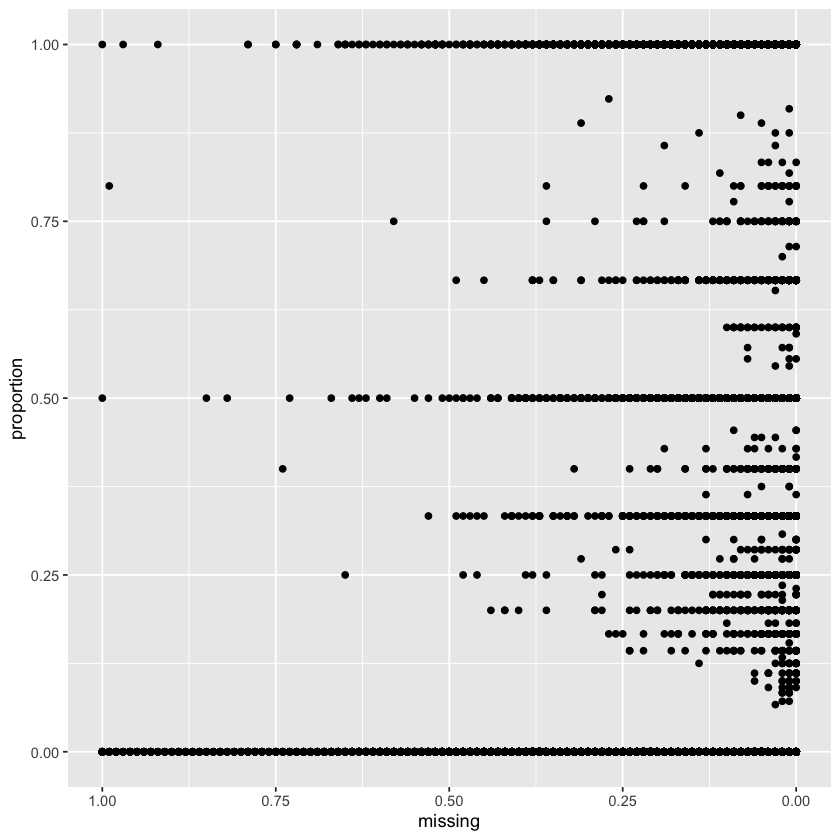

In [21]:
ggplot(res, aes(x = missing, y = proportion)) + geom_point() + scale_x_reverse()